# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives

You will be able to:

* Practice loading data with pandas
* Practice calculating measures of centrality and dispersion with pandas
* Practice creating subsets of data with pandas
* Practice using data visualizations to explore data, and interpreting those visualizations
* Perform a full exploratory data analysis process to gain insight about a dataset 

## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [91]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [92]:
# Your code here
df=pd.read_csv(r'data/ames.csv', index_col=0)

The following code checks that you loaded the data correctly:

In [93]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 80

Inspect the contents of the dataframe:

In [94]:
# Run this cell without changes
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [95]:
# Run this cell without changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [96]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

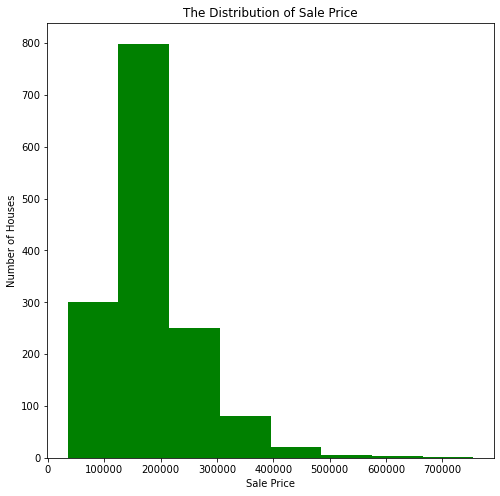

In [97]:
# Your code here
plt.figure(figsize=(8,8))
plt.hist(df["SalePrice"], bins=8, color="green")
plt.title("The Distribution of Sale Price")
plt.xlabel("Sale Price")
plt.ylabel("Number of Houses")
plt.show()

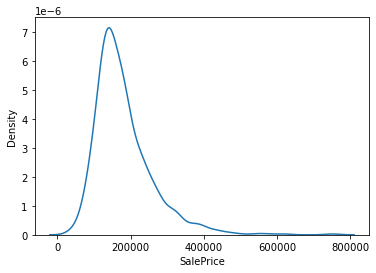

In [98]:
#To understand the shape of the distribution in a better way
import seaborn as sns
sns.kdeplot(df.SalePrice);

Now, print out the mean, median, and standard deviation:

In [99]:
# Your code here
df[["SalePrice"]].agg(["mean", "median", "std"])

,SalePrice
mean,180921.195890
median,163000.000000
std,79442.502883


In the cell below, interpret the above information.

In [100]:
# Replace None with appropriate text
"""
From the above histogram, we can conclude that the data is positively skewed, which means that most of the houses lie  in the 
lower to middle price ranges. There are a few houses which are much more expensive and they are therefore the ones that push 
the mean to 180000, making the distribution skewed to the right.
"""

'\nFrom the above histogram, we can conclude that the data is positively skewed, which means that most of the houses lie  in the \nlower to middle price ranges. There are a few houses which are much more expensive and they are therefore the ones that push \nthe mean to 180000, making the distribution skewed to the right.\n'

### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

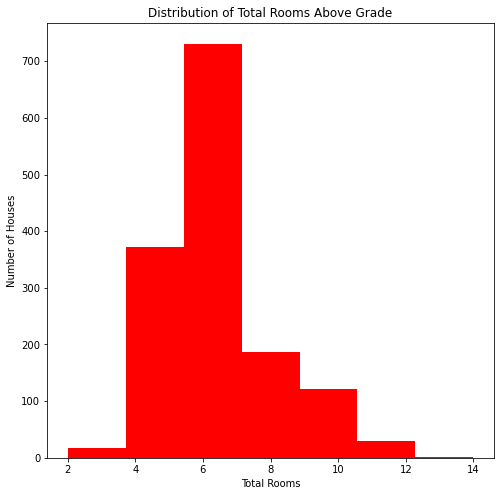

In [101]:
# Your code here
plt.figure(figsize=(8,8))
plt.hist(df["TotRmsAbvGrd"], bins=7, color="red")
plt.title("Distribution of Total Rooms Above Grade")
plt.xlabel("Total Rooms")
plt.ylabel("Number of Houses")
plt.show()

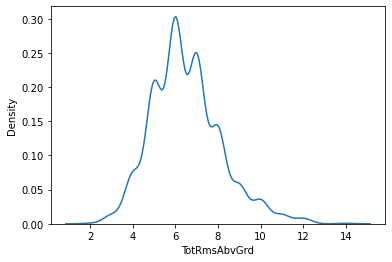

In [102]:
sns.kdeplot(df.TotRmsAbvGrd);

Now, print out the mean, median, and standard deviation:

In [103]:
# Your code here
df[["TotRmsAbvGrd"]].agg(["mean", "median", "std"])

,TotRmsAbvGrd
mean,6.517808
median,6.000000
std,1.625393


In the cell below, interpret the above information.

In [104]:
# Replace None with appropriate text
"""
The distribution of the total rooms is normally distributed because the mean and the median are almost the same, i.e. 6 rooms.
As much as there are a few houses with more than 6 rooms, they do not affect the mean as much.
"""

'\nThe distribution of the total rooms is normally distributed because the mean and the median are almost the same, i.e. 6 rooms.\nAs much as there are a few houses with more than 6 rooms, they do not affect the mean as much.\n'

### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

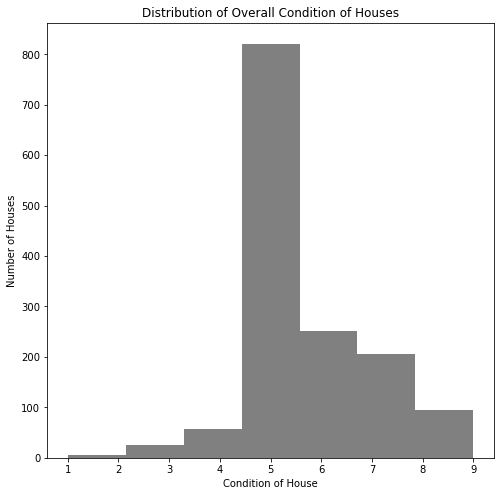

In [105]:
# Your code here
plt.figure(figsize=(8,8))
plt.hist(df["OverallCond"], bins=7, color="grey")
plt.title("Distribution of Overall Condition of Houses")
plt.xlabel("Condition of House")
plt.ylabel("Number of Houses")
plt.show()

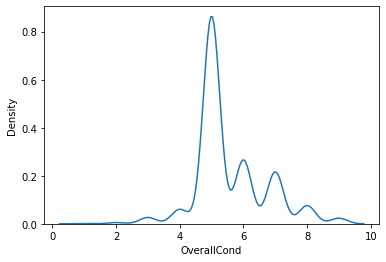

In [106]:
sns.kdeplot(df.OverallCond);

Now, print out the mean, median, and standard deviation:

In [107]:
# Your code here
df[["OverallCond"]].agg(["mean", "median", "std"])

,OverallCond
mean,5.575342
median,5.000000
std,1.112799


In the cell below, interpret the above information.

In [108]:
# Replace None with appropriate text
"""
The overall condition of the houses is normally distributed as we can see in the histogram. This can also be seen through the
median and mean values which are almost equal; both the mean and the median are 5. 
"""

'\nThe overall condition of the houses is normally distributed as we can see in the histogram. This can also be seen through the\nmedian and mean values which are almost equal; both the mean and the median are 5. \n'

## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [109]:
# Replace None with appropriate code
below_average_condition = df[df["OverallCond"] < 5]
average_condition = df[df["OverallCond"] == 5]
above_average_condition = df[df["OverallCond"] > 5]

The following code checks that you created the subsets correctly:

In [110]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80
assert average_condition.shape[1] == 80
assert above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551

The following code will produce a plot of the distributions of sale price for each of these subsets:

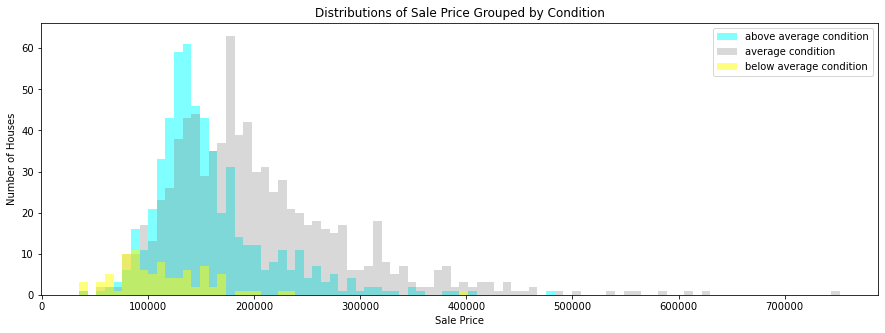

In [111]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

In [112]:
# Replace None with appropriate text
"""
First of all, we realize that most houses are clustered between above average and average conditions, which is theoritically
expected. Houses that have below average condition are very few.

Houses with below average condition also have a low sale price as compared to the other two conditions; that is something that
is expected.

Surprisingly, houses with average condition are more in number and are also much more pricier as compared to houses with above
average condition. In real sense, it should be vice versa; this ought to be studied because normally we would expect houses
with above average condition to have a higher sale price.
"""

'\nFirst of all, we realize that most houses are clustered between above average and average conditions, which is theoritically\nexpected. Houses that have below average condition are very few.\n\nHouses with below average condition also have a low sale price as compared to the other two conditions; that is something that\nis expected.\n\nSurprisingly, houses with average condition are more in number and are also much more pricier as compared to houses with above\naverage condition. In real sense, it should be vice versa; this ought to be studied because normally we would expect houses\nwith above average condition to have a higher sale price.\n'

## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [113]:
# Your code here
correlation_df = df.select_dtypes(include='number').corr()["SalePrice"].sort_values(ascending=False)
max_pst_corr_val= correlation_df[1]
max_pst_corr_col=correlation_df.index[1]
print(f"The most positively correlated value is {max_pst_corr_val}")
print(f"The most positively correlated column is {max_pst_corr_col}")

The most positively correlated value is 0.7909816005838047
The most positively correlated column is OverallQual


Now, find the ***most negatively correlated*** column:

In [114]:
# Your code here
max_ngt_corr_val= correlation_df[-1]
max_ngt_corr_col=correlation_df.index[-1]
print(f"The most negatively correlated value is {max_ngt_corr_val}")
print(f"The most negatively correlated column is {max_ngt_corr_col}")

The most negatively correlated value is -0.1359073708421417
The most negatively correlated column is KitchenAbvGr


Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

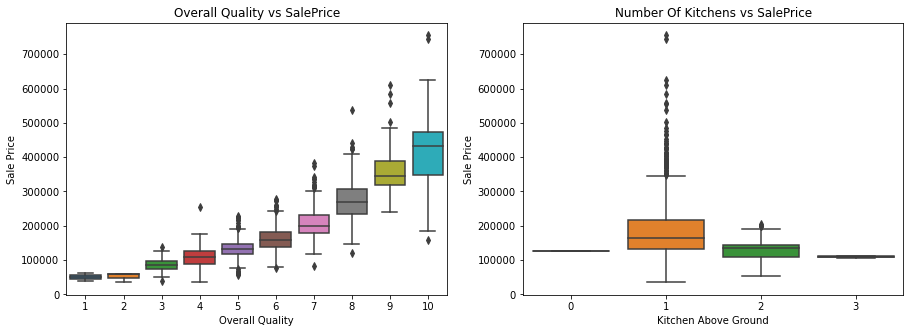

In [115]:
# Replace None with appropriate code

import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot distribution of column with highest correlation
sns.boxplot(
    x=df[max_pst_corr_col],
    y=df["SalePrice"],
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=df[max_ngt_corr_col],
    y=df["SalePrice"],
    ax=ax2
)

# Customize labels
ax1.set_title("Overall Quality vs SalePrice")
ax1.set_xlabel("Overall Quality")
ax1.set_ylabel("Sale Price")
ax2.set_title("Number Of Kitchens vs SalePrice")
ax2.set_xlabel("Kitchen Above Ground")
ax2.set_ylabel("Sale Price");

Interpret the results below. Consult `data/data_description.txt` as needed.

In [116]:
# Replace None with appropriate text
"""
From the boxplot on the left, we can clearly see that houses with a higher overall quality are much pricier than houses with
low overall quality, this then confirms that sale price and overall quality have a strong positive correlation.

From the boxplot on the right, we can see that houses with less kitchens are pricier than houses with more kitchens. For 
example, the houses with one kitchen are cheaper than the ones with two kitchens, and the houses with no kitchens are also 
cheaper than the ones with three kitchens. This basically shows that the sales price and the number of kitchens here, have 
a strong negative correlation.
"""

'\nFrom the boxplot on the left, we can clearly see that houses with a higher overall quality are much pricier than houses with\nlow overall quality, this then confirms that sale price and overall quality have a strong positive correlation.\n\nFrom the boxplot on the right, we can see that houses with less kitchens are pricier than houses with more kitchens. For \nexample, the houses with one kitchen are cheaper than the ones with two kitchens, and the houses with no kitchens are also \ncheaper than the ones with three kitchens. This basically shows that the sales price and the number of kitchens here, have \na strong negative correlation.\n'

## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [117]:
# Run this cell without changes
df["YrSold"].value_counts().sort_index()

2006    314
2007    329
2008    304
2009    338
2010    175
Name: YrSold, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

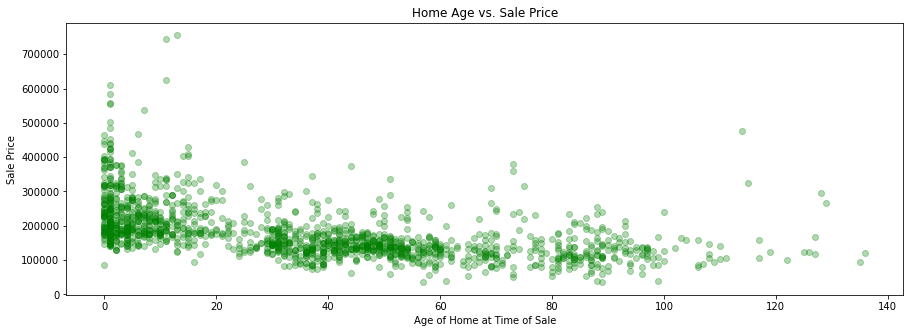

In [118]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");

Interpret this plot below:

In [119]:
# Replace None with appropriate text
"""
The scatter plot shows that newer houses tend to have higher sale prices, while older houses are generally sold for less. 
This means that as a house gets older, its price usually goes down.
"""

'\nThe scatter plot shows that newer houses tend to have higher sale prices, while older houses are generally sold for less. \nThis means that as a house gets older, its price usually goes down.\n'

## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset. You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.